In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np

In [2]:
# Mounting Google Drive (Note: Specific to Google Colab Environment)
# from google.colab import drive
# drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [4]:
# Loading Dataset from Google Drive
df_tweets=pd.read_csv("tweets.csv", encoding='utf-8')

C:\Users\srinivas\AppData\Local\Temp\ipykernel_27168\313338960.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tweets=pd.read_csv("tweets.csv", encoding='utf-8')


In [5]:
# Previewing the Loaded Dataset
df_tweets.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2022-02-24 03:12:47+00:00,1496684505247141888.0,🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,2.0,17.0,47.0,1.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,"['#Kharkiv.', '#Russia', '#Ukraine', '#Ukraine...",9.0
1,2022-02-24 03:18:54+00:00,1496686044275695616.0,🇺🇦 Kharkiv is officially being struck by major...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,2.0,104.0,188.0,8.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0
2,2022-02-24 03:22:42+00:00,1496687000375726080.0,🇺🇦 More angles on that strike in Kharkiv. #Rus...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,1.0,41.0,75.0,5.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0
3,2022-02-24 03:25:36+00:00,1496687731434565632.0,🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,21.0,407.0,1099.0,149.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Mariupol', '#Russia', '#Ukraine', '#Ukraine...",9.0
4,2022-02-24 03:27:28+00:00,1496688201242759168.0,🇺🇦 Damage caused by strike in Kharkiv... #Russ...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,7.0,152.0,207.0,22.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0


In [6]:
# Cleaning Data and Converting Column Types
# Convert 'Datetime' to datetime format
df_tweets['Datetime'] = pd.to_datetime(df_tweets['Datetime'], errors='coerce')

# Convert numeric columns to numeric types and check for missing values
numeric_cols = ['ReplyCount', 'RetweetCount', 'LikeCount', 'QuoteCount', 'hastag_counts']
df_tweets[numeric_cols] = df_tweets[numeric_cols].apply(pd.to_numeric, errors='coerce')
missing_values = df_tweets.isnull().sum()

# Dropping unnecessary columns for our analysis
unnecessary_cols = ['CountLinks', 'Source', 'Media', 'QuotedTweet', 'MentionedUsers']
df_tweets_cleaned = df_tweets.drop(columns=unnecessary_cols)

# Display missing values and data types of the cleaned dataset
missing_values, df_tweets_cleaned.dtypes

(Datetime          308968
 Tweet Id          308964
 Text              308964
 Username          355786
 Permalink         355786
 User              355786
 Outlinks          378898
 CountLinks        378898
 ReplyCount        355786
 RetweetCount      355786
 LikeCount         355786
 QuoteCount        355790
 ConversationId    355786
 Language          355790
 Source            355790
 Media             386557
 QuotedTweet       392113
 MentionedUsers    387415
 hashtag           355790
 hastag_counts     355790
 dtype: int64,
 Datetime          datetime64[ns, UTC]
 Tweet Id                       object
 Text                           object
 Username                       object
 Permalink                      object
 User                           object
 Outlinks                       object
 ReplyCount                    float64
 RetweetCount                  float64
 LikeCount                     float64
 QuoteCount                    float64
 ConversationId                 obje

In [7]:
# Correcting column names for dropping
columns_to_drop = ['Permalink', 'Language', 'hashtag']  # Updated based on initial dataset structure

# Dropping the corrected set of unnecessary columns
df_tweets_cleaned = df_tweets.drop(columns=columns_to_drop, errors='ignore')

# Reviewing missing values again with the cleaned dataset
missing_values_cleaned = df_tweets_cleaned.isnull().sum()

# Reviewing data types of the cleaned dataset
data_types_cleaned = df_tweets_cleaned.dtypes

missing_values_cleaned, data_types_cleaned


(Datetime          308968
 Tweet Id          308964
 Text              308964
 Username          355786
 User              355786
 Outlinks          378898
 CountLinks        378898
 ReplyCount        355786
 RetweetCount      355786
 LikeCount         355786
 QuoteCount        355790
 ConversationId    355786
 Source            355790
 Media             386557
 QuotedTweet       392113
 MentionedUsers    387415
 hastag_counts     355790
 dtype: int64,
 Datetime          datetime64[ns, UTC]
 Tweet Id                       object
 Text                           object
 Username                       object
 User                           object
 Outlinks                       object
 CountLinks                     object
 ReplyCount                    float64
 RetweetCount                  float64
 LikeCount                     float64
 QuoteCount                    float64
 ConversationId                 object
 Source                         object
 Media                          obje

In [8]:
df_tweets_cleaned.head()

,Datetime,Tweet Id,Text,Username,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Source,Media,QuotedTweet,MentionedUsers,hastag_counts
0,2022-02-24 03:12:47+00:00,1496684505247141888.0,🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...,IdeologyWars,https://twitter.com/IdeologyWars,NaN,NaN,2.0,17.0,47.0,1.0,1496493071495987200.0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,9.0
1,2022-02-24 03:18:54+00:00,1496686044275695616.0,🇺🇦 Kharkiv is officially being struck by major...,IdeologyWars,https://twitter.com/IdeologyWars,NaN,NaN,2.0,104.0,188.0,8.0,1496493071495987200.0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,8.0
2,2022-02-24 03:22:42+00:00,1496687000375726080.0,🇺🇦 More angles on that strike in Kharkiv. #Rus...,IdeologyWars,https://twitter.com/IdeologyWars,NaN,NaN,1.0,41.0,75.0,5.0,1496493071495987200.0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,8.0
3,2022-02-24 03:25:36+00:00,1496687731434565632.0,🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...,IdeologyWars,https://twitter.com/IdeologyWars,NaN,NaN,21.0,407.0,1099.0,149.0,1496493071495987200.0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,9.0
4,2022-02-24 03:27:28+00:00,1496688201242759168.0,🇺🇦 Damage caused by strike in Kharkiv... #Russ...,IdeologyWars,https://twitter.com/IdeologyWars,NaN,NaN,7.0,152.0,207.0,22.0,1496493071495987200.0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,8.0


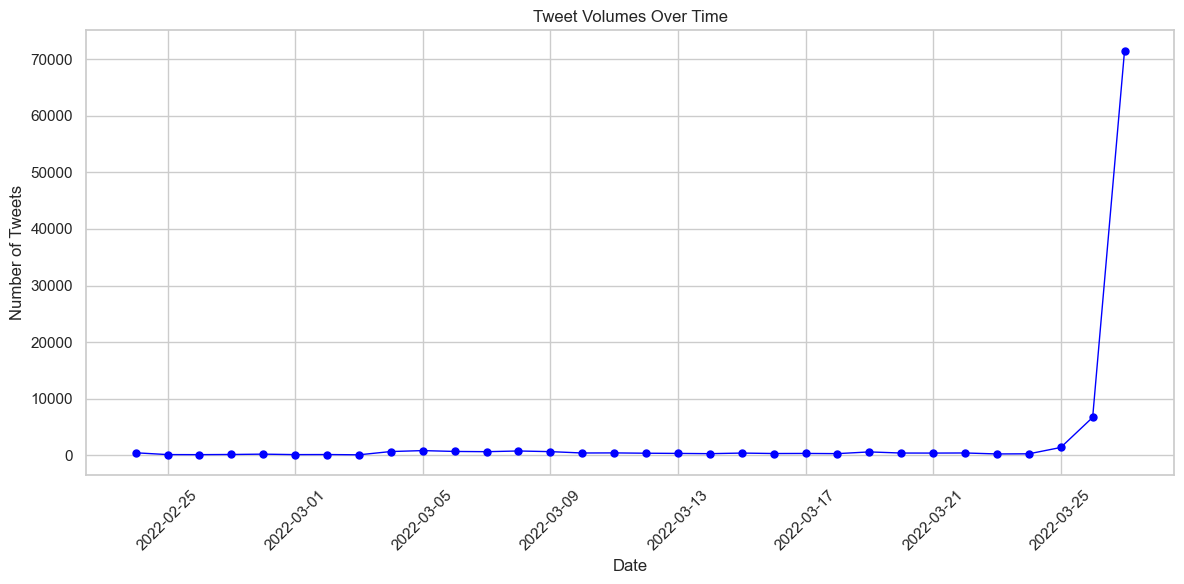

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Assuming you have pandas imported as well

# Setting plot style
sns.set(style="whitegrid")

# Ensuring 'Datetime' is in datetime format (if it's not already)
df_tweets_cleaned['Datetime'] = pd.to_datetime(df_tweets_cleaned['Datetime'])

# Dropping rows where 'Datetime' is NaN for time series analysis and creating a copy to avoid SettingWithCopyWarning
df_tweets_time_series = df_tweets_cleaned.dropna(subset=['Datetime']).copy()

# Creating a column for Date (without time) for daily aggregation
df_tweets_time_series['Date'] = df_tweets_time_series['Datetime'].dt.date

# Aggregating tweet counts by Date
tweet_counts_by_date = df_tweets_time_series.groupby('Date').size()

# Plotting tweet volumes over time
plt.figure(figsize=(12, 6))
tweet_counts_by_date.plot(kind='line', color='blue', marker='o', linestyle='-', linewidth=1, markersize=5)
plt.title('Tweet Volumes Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


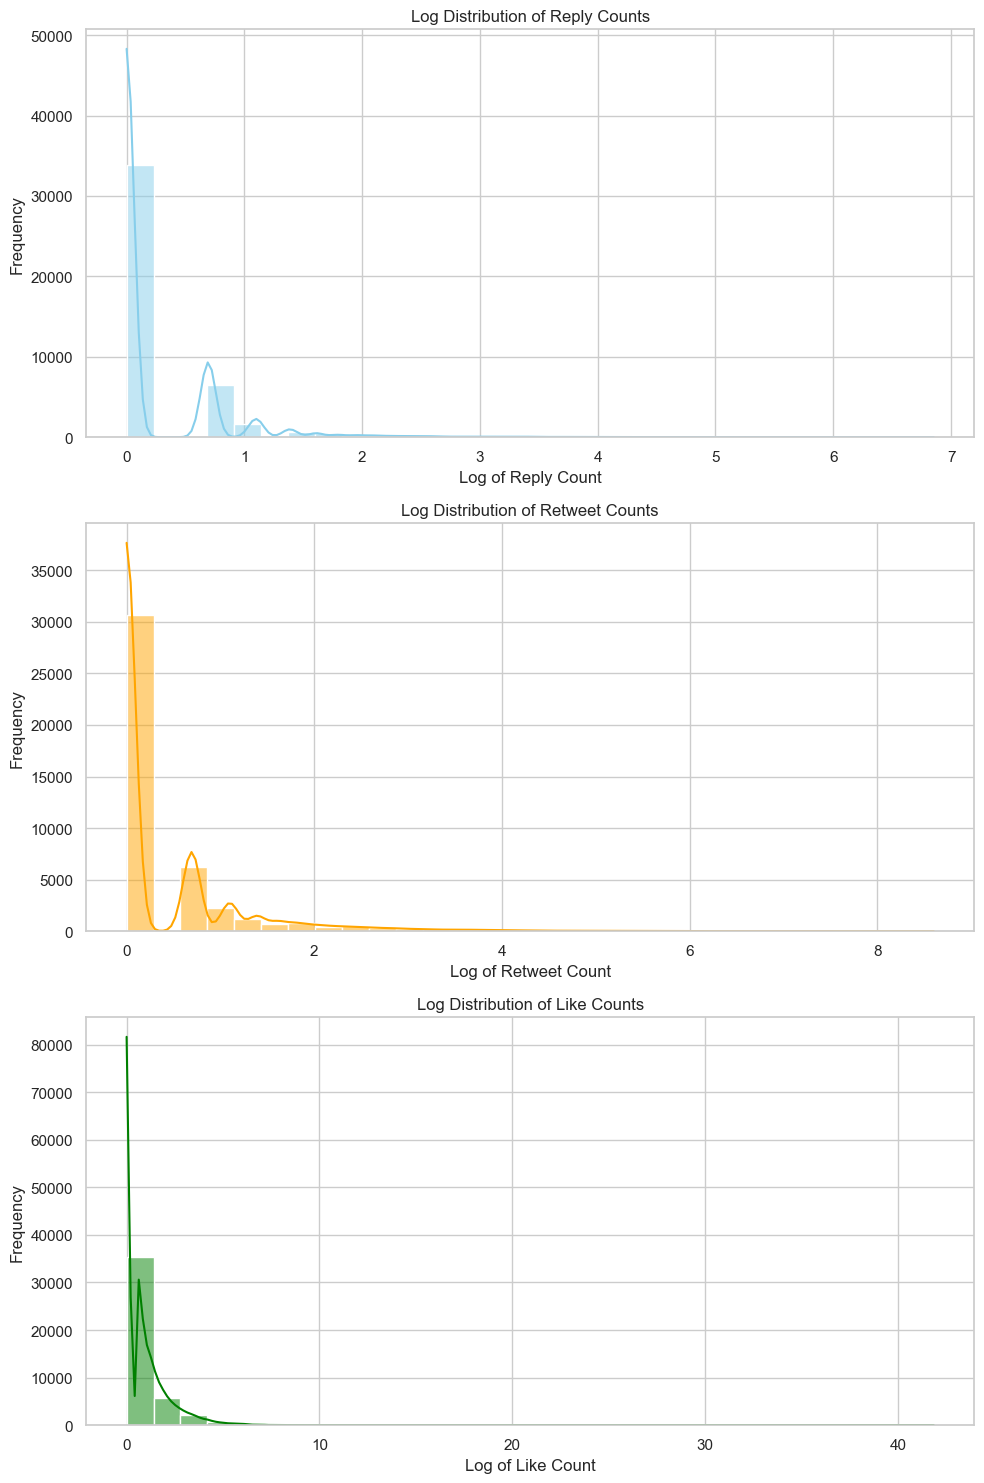

In [10]:
import numpy as np

# Performing the logarithmic transformation again with numpy imported
df_tweets_cleaned['LogReplyCount'] = np.log1p(df_tweets_cleaned['ReplyCount'])
df_tweets_cleaned['LogRetweetCount'] = np.log1p(df_tweets_cleaned['RetweetCount'])
df_tweets_cleaned['LogLikeCount'] = np.log1p(df_tweets_cleaned['LikeCount'])

# Setting up the figure for logarithmic scale histograms again
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Histogram of LogReplyCount
sns.histplot(data=df_tweets_cleaned, x="LogReplyCount", bins=30, ax=axs[0], color="skyblue", kde=True)
axs[0].set_title('Log Distribution of Reply Counts')
axs[0].set_xlabel('Log of Reply Count')
axs[0].set_ylabel('Frequency')

# Histogram of LogRetweetCount
sns.histplot(data=df_tweets_cleaned, x="LogRetweetCount", bins=30, ax=axs[1], color="orange", kde=True)
axs[1].set_title('Log Distribution of Retweet Counts')
axs[1].set_xlabel('Log of Retweet Count')
axs[1].set_ylabel('Frequency')

# Histogram of LogLikeCount
sns.histplot(data=df_tweets_cleaned, x="LogLikeCount", bins=30, ax=axs[2], color="green", kde=True)
axs[2].set_title('Log Distribution of Like Counts')
axs[2].set_xlabel('Log of Like Count')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


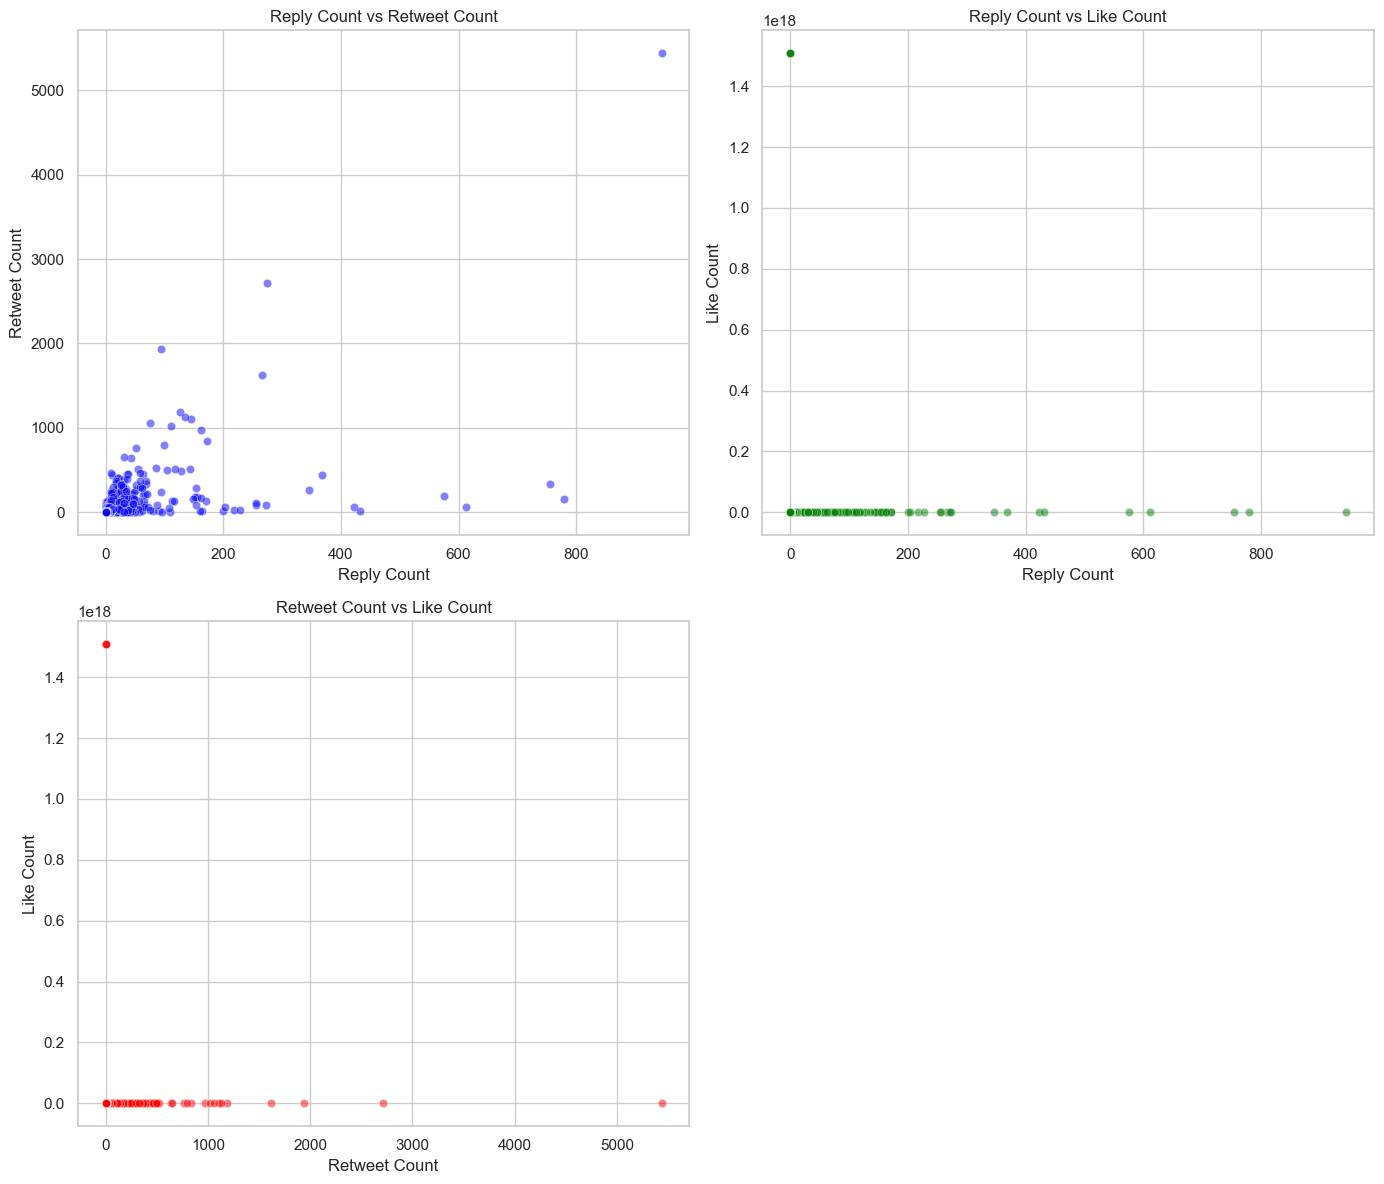

In [11]:
# Setting up the figure for scatter plots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Scatter plot of ReplyCount vs RetweetCount
sns.scatterplot(data=df_tweets_cleaned, x="ReplyCount", y="RetweetCount", ax=axs[0, 0], color="blue", alpha=0.5)
axs[0, 0].set_title('Reply Count vs Retweet Count')
axs[0, 0].set_xlabel('Reply Count')
axs[0, 0].set_ylabel('Retweet Count')

# Scatter plot of ReplyCount vs LikeCount
sns.scatterplot(data=df_tweets_cleaned, x="ReplyCount", y="LikeCount", ax=axs[0, 1], color="green", alpha=0.5)
axs[0, 1].set_title('Reply Count vs Like Count')
axs[0, 1].set_xlabel('Reply Count')
axs[0, 1].set_ylabel('Like Count')

# Scatter plot of RetweetCount vs LikeCount
sns.scatterplot(data=df_tweets_cleaned, x="RetweetCount", y="LikeCount", ax=axs[1, 0], color="red", alpha=0.5)
axs[1, 0].set_title('Retweet Count vs Like Count')
axs[1, 0].set_xlabel('Retweet Count')
axs[1, 0].set_ylabel('Like Count')

# Removing the empty subplot (lower right)
fig.delaxes(axs[1][1])

plt.tight_layout()
plt.show()


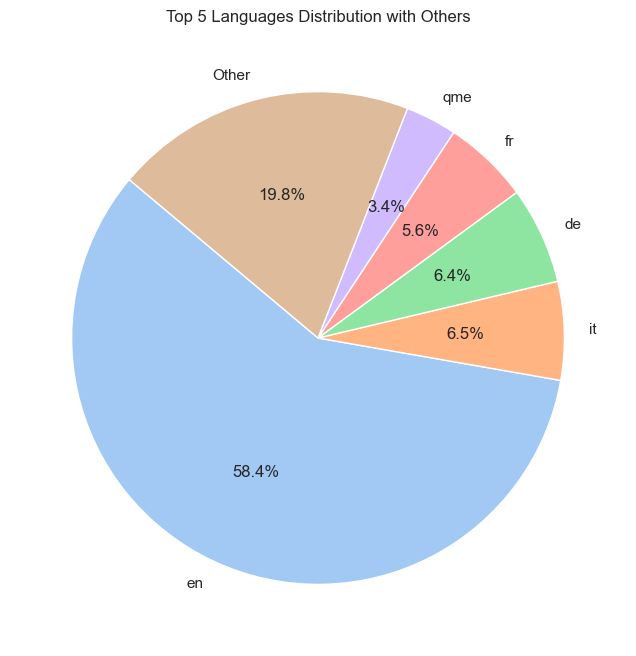

In [12]:
# Adjusting the analysis to take the top 5 languages and grouping the rest as 'Other'
language_distribution = df_tweets['Language'].value_counts()

# Taking the top 10 languages (excluding 'nan' if present) and grouping the rest as 'Other'
top_5_languages = language_distribution.head(5)
other_languages_sum_5 = language_distribution[5:].sum()
if 'nan' in top_5_languages.index:
    other_languages_sum_5 += top_5_languages['nan']
    top_5_languages = top_5_languages.drop('nan')

top_5_languages['Other'] = other_languages_sum_5

# Plotting a pie chart for the top 5 languages with the 6th category as 'Other'
plt.figure(figsize=(10, 8))
top_5_languages.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel', 6))
plt.title('Top 5 Languages Distribution with Others')
plt.ylabel('')  # Hide the y-label as it's not needed for a pie chart
plt.show()


In [13]:
df_tweets = df_tweets[df_tweets['Language'] == 'en']

In [14]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Load the dataset
# Assume df_tweets is already loaded with the appropriate data

# Clean the tweet text
def clean_text(text):
    text = str(text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#[^\s]+','', text)  # Adjusted to remove text after hashtag
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'russian', '', text,flags=re.IGNORECASE)
    text = re.sub(r'russia', '', text,flags=re.IGNORECASE)
    text = re.sub(r'ukrainian', '', text,flags=re.IGNORECASE)
    text = re.sub(r'ukraine', '', text,flags=re.IGNORECASE)
    text = re.sub(r'\s+', ' ', text).strip()
    return text.lower()

df_tweets['CleanText'] = df_tweets['Text'].apply(clean_text)

# Function to extract n-grams
def get_top_ngrams(corpus, n=None, ngram_range=(1, 1)):
    vec = CountVectorizer(stop_words='english', ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Extracting the top 10 unigrams, bigrams, and trigrams
top_unigrams = get_top_ngrams(df_tweets['CleanText'], n=10, ngram_range=(1, 1))
top_bigrams = get_top_ngrams(df_tweets['CleanText'], n=10, ngram_range=(2, 2))
top_trigrams = get_top_ngrams(df_tweets['CleanText'], n=10, ngram_range=(3, 3))

print("Top Unigrams:", top_unigrams)
print("Top Bigrams:", top_bigrams)
print("Top Trigrams:", top_trigrams)


Top Unigrams: [('war', 3633), ('amp', 2308), ('putin', 2076), ('people', 1965), ('world', 1469), ('like', 1053), ('just', 1026), ('president', 990), ('says', 914), ('power', 902)]
Top Bigrams: [('remain power', 364), ('regime change', 300), ('humanitarian aid', 191), ('armed forces', 179), ('war crimes', 168), ('war criminal', 157), ('stop war', 153), ('joe biden', 141), ('children families', 141), ('families affected', 139)]
Top Trigrams: [('children families affected', 137), ('sending urgent humanitarian', 136), ('urgent humanitarian aid', 136), ('humanitarian aid children', 136), ('aid children families', 135), ('families affected learn', 135), ('unicef sending urgent', 134), ('affected learn donate', 133), ('learn donate today', 133), ('man remain power', 92)]


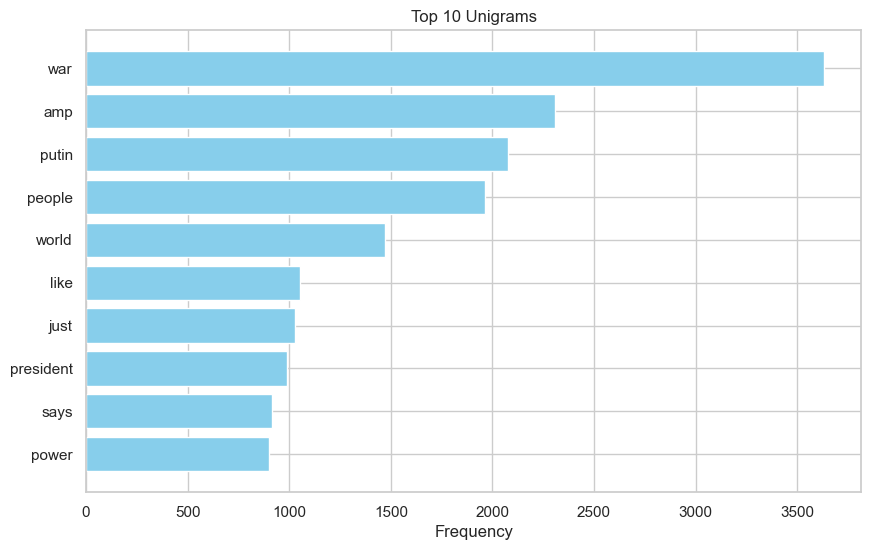

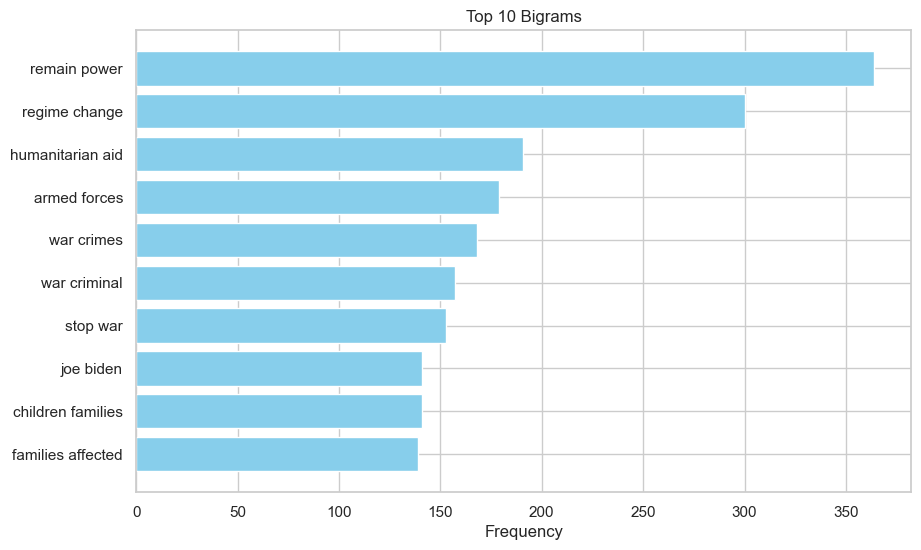

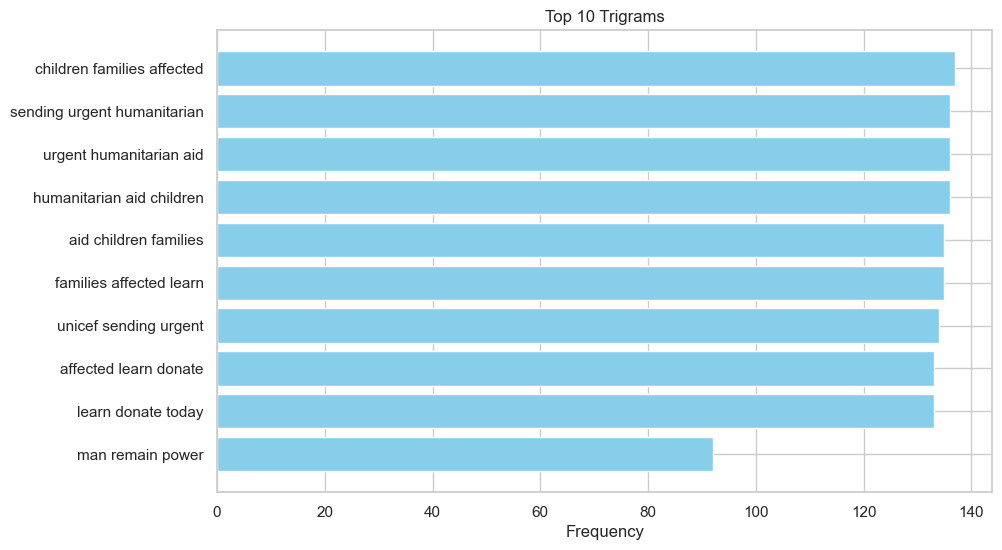

In [15]:
import matplotlib.pyplot as plt

# Function to plot top n-grams
def plot_top_ngrams(top_ngrams, title):
    ngrams = [item[0] for item in top_ngrams]
    counts = [item[1] for item in top_ngrams]

    plt.figure(figsize=(10, 6))
    plt.barh(ngrams, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
    plt.show()

# Plotting the top unigrams, bigrams, and trigrams
plot_top_ngrams(top_unigrams, 'Top 10 Unigrams')
plot_top_ngrams(top_bigrams, 'Top 10 Bigrams')
plot_top_ngrams(top_trigrams, 'Top 10 Trigrams')


In [16]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn.functional import softmax
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Example usage:
# Assuming you have a model and tensors (inputs) for your model
# model = model.to(device)  # This moves your model to the specified device (GPU or CPU)
# inputs = inputs.to(device)  # This moves your tensors to the same device as the model

# # Now, computations on the model using 'inputs' will run on the specified device
# output = model(inputs)

# Load the model and tokenizer
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Function to perform sentiment analysis
import torch
from torch.nn.functional import softmax
import numpy as np

# Assuming 'model' and 'tokenizer' are already defined and moved to the GPU
model = model.to(device)

def batched_sentiment_analysis(texts, batch_size=32):
    # Container for results
    batched_labels = []
    batched_probs = []

    for i in range(0, len(texts), batch_size):
        # Batch texts
        batch_texts = texts[i:i+batch_size]

        # Tokenize and encode the batch
        tokens = tokenizer(batch_texts, return_tensors='pt', padding=True, truncation=True, max_length=512)
        tokens = tokens.to(device)

        # Get model output for the batch
        with torch.no_grad():
            output = model(**tokens)

        # Compute probabilities
        probabilities = softmax(output.logits, dim=1).cpu().numpy()

        # Determine predicted sentiments
        sentiments = np.argmax(probabilities, axis=1)
        labels = ['Negative', 'Neutral', 'Positive']

        # Store results
        batched_labels.extend([labels[sentiment] for sentiment in sentiments])
        batched_probs.extend(probabilities.max(axis=1))

    return batched_labels, batched_probs

# Apply batched sentiment analysis to the entire dataset
# Convert 'CleanText' column to a list of texts for processing
texts = df_tweets['CleanText'].tolist()
labels, probs = batched_sentiment_analysis(texts)

# Assign results back to DataFrame
df_tweets['Sentiment'] = labels



In [17]:
# Assuming df_tweets has a column 'CleanText' for the tweet text
# And the get_sentiment function is defined and ready

# Applying sentiment analysis to each tweet and storing the results in a new column
#df_tweets['Sentiment'] = df_tweets['CleanText'].apply(lambda x: get_sentiment(x)[0])

# Now df_tweets includes a 'Sentiment' column with labels 'Positive', 'Negative', 'Neutral'


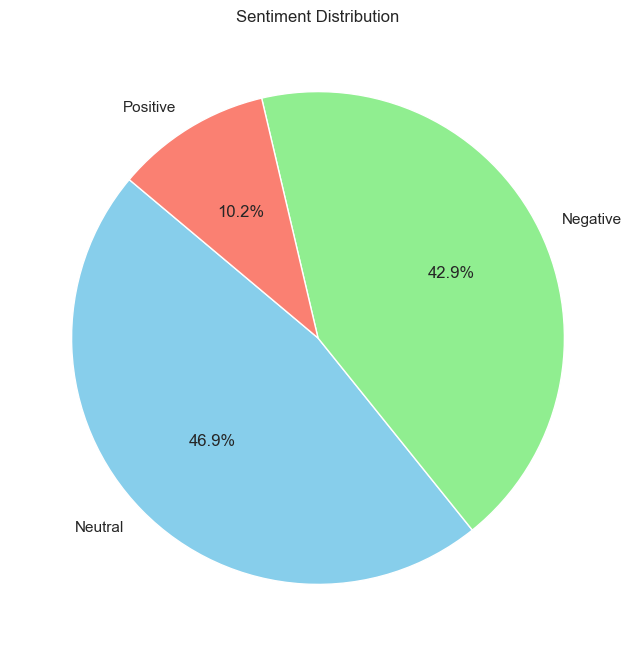

In [18]:
import matplotlib.pyplot as plt

# Assuming df_tweets has a 'Sentiment' column with values 'Positive', 'Negative', 'Neutral'
sentiment_distribution = df_tweets['Sentiment'].value_counts()

plt.figure(figsize=(8, 8))
sentiment_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()


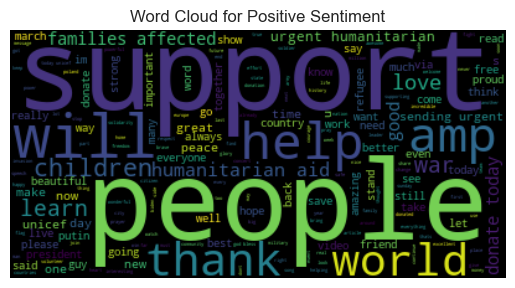

In [19]:
from wordcloud import WordCloud

# Example for Positive sentiment word cloud
positive_text = " ".join(review for review in df_tweets[df_tweets["Sentiment"] == "Positive"]["CleanText"])
wordcloud = WordCloud(background_color="black").generate(positive_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Positive Sentiment")
plt.show()


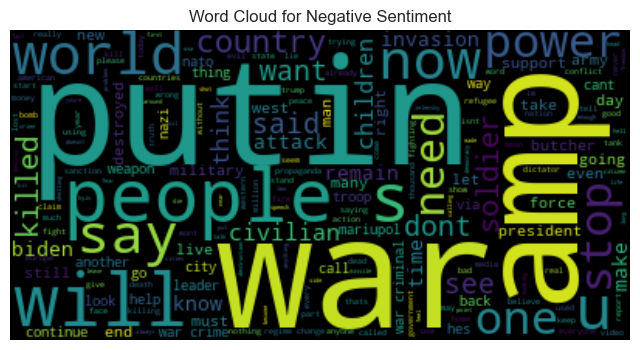

In [20]:
# Assuming df_tweets is your DataFrame and it contains 'CleanText' and 'Sentiment' columns

# Combine all text for negative sentiment
negative_text = " ".join(review for review in df_tweets[df_tweets["Sentiment"] == "Negative"]["CleanText"])

# Generate a word cloud image for negative sentiment
wordcloud_negative = WordCloud(background_color="black").generate(negative_text)

# Display the generated word cloud image for negative sentiment
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Negative Sentiment")
plt.show()


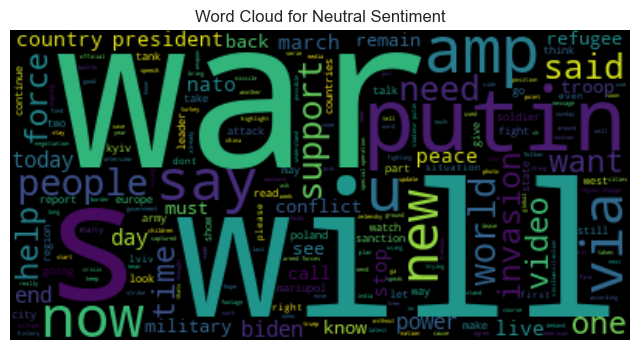

In [21]:
# Combine all text for neutral sentiment
neutral_text = " ".join(review for review in df_tweets[df_tweets["Sentiment"] == "Neutral"]["CleanText"])

# Generate a word cloud image for neutral sentiment
wordcloud_neutral = WordCloud(background_color="black").generate(neutral_text)

# Display the generated word cloud image for neutral sentiment
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Neutral Sentiment")
plt.show()


In [22]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from torch.nn.functional import softmax
import numpy as np

# Load the model and tokenizer for emotion recognition
model_name = "bhadresh-savani/distilbert-base-uncased-emotion"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Check if GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Move the model to the appropriate device
model.to(device)

def batched_emotion_analysis(texts, batch_size=32):
    model.eval()  # Set the model to evaluation mode
    batched_emotions = []

    for i in range(0, len(texts), batch_size):
        # Process texts in batches
        batch_texts = texts[i:i + batch_size]
        # Tokenize and encode the batch
        inputs = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)

        # Perform the forward pass and disable gradient calculation
        with torch.no_grad():
            outputs = model(**inputs)

        # Compute softmax to get probabilities
        probabilities = softmax(outputs.logits, dim=1)
        # Get the predicted emotions
        top_preds = torch.argmax(probabilities, dim=1)

        emotions = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
        batched_emotions.extend(emotions[pred] for pred in top_preds.cpu().numpy())

    return batched_emotions

# Apply batched emotion recognition to the entire dataset
# Assuming df_tweets['CleanText'] contains the texts to process
texts = df_tweets['CleanText'].tolist()
df_tweets['Emotion'] = batched_emotion_analysis(texts, batch_size=32)


Using device: cpu


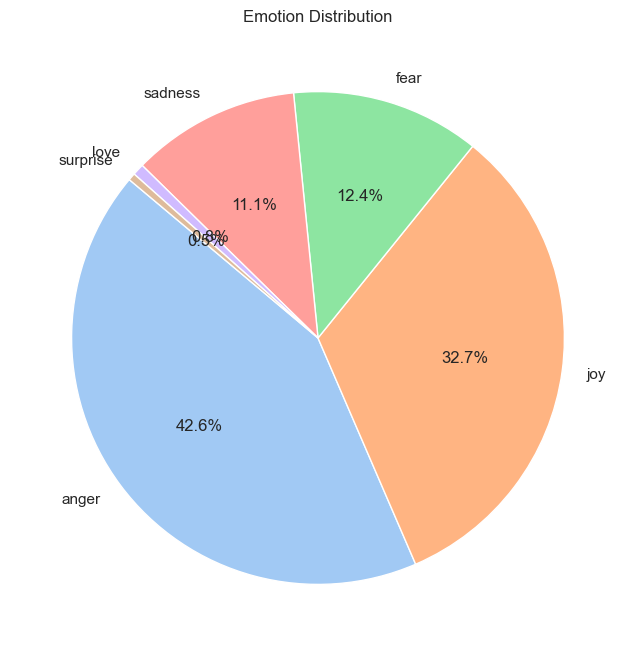

In [23]:
emotion_distribution = df_tweets['Emotion'].value_counts()

plt.figure(figsize=(8, 8))
emotion_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel', len(emotion_distribution)))
plt.title('Emotion Distribution')
plt.ylabel('')
plt.show()


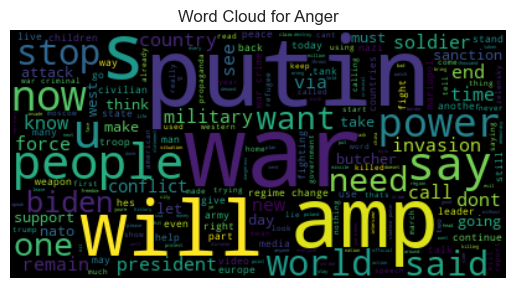

In [24]:
from wordcloud import WordCloud

anger_text = " ".join(text for text in df_tweets[df_tweets["Emotion"] == "anger"]["CleanText"])
wordcloud = WordCloud(background_color="black").generate(anger_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Anger")
plt.show()



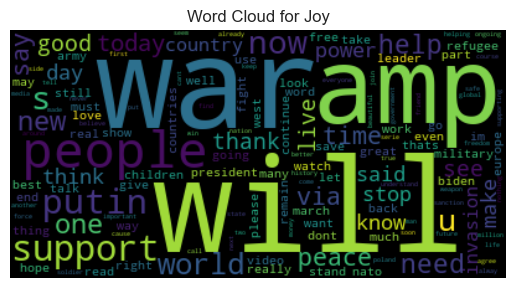

In [25]:
joy_text = " ".join(text for text in df_tweets[df_tweets["Emotion"] == "joy"]["CleanText"])
wordcloud = WordCloud(background_color="black").generate(joy_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Joy")
plt.show()



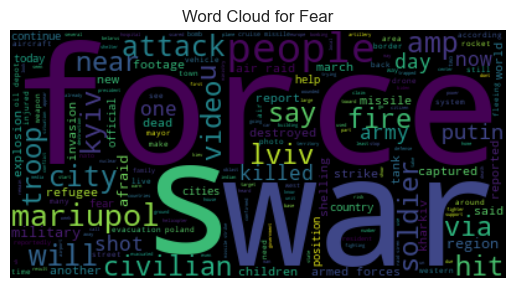

In [26]:
fear_text = " ".join(text for text in df_tweets[df_tweets["Emotion"] == "fear"]["CleanText"])
wordcloud = WordCloud(background_color="black").generate(fear_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Fear")
plt.show()



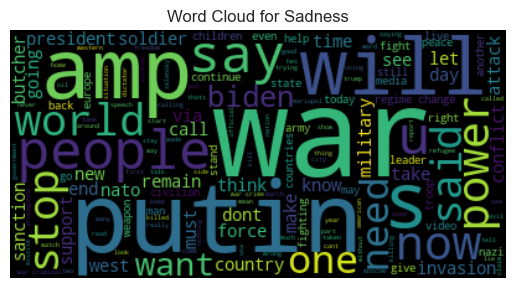

In [27]:
sad_text = " ".join(text for text in df_tweets[df_tweets["Emotion"] == "anger"]["CleanText"])
wordcloud = WordCloud(background_color="black").generate(sad_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Sadness")
plt.show()

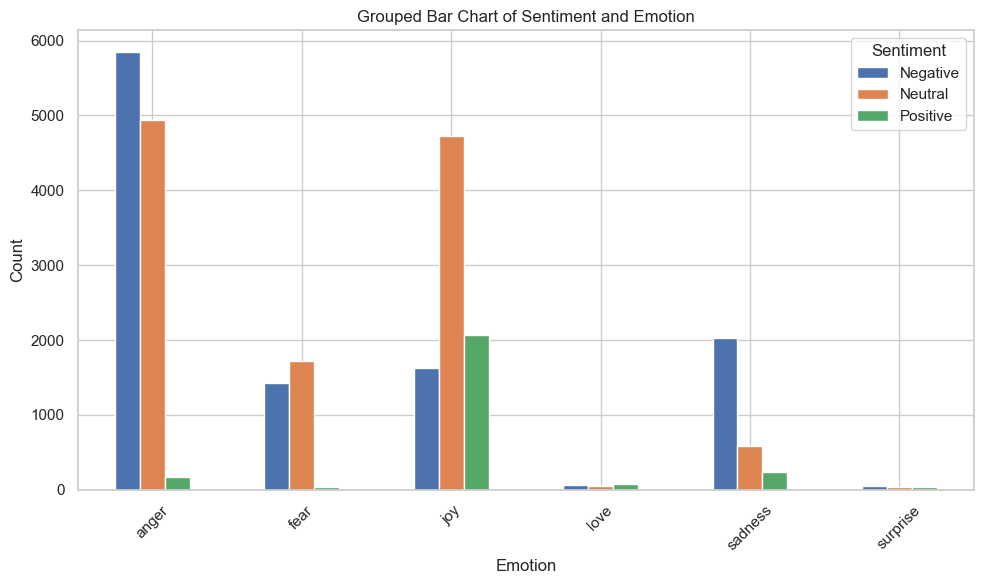

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate counts by Sentiment and Emotion
agg_df = df_tweets.groupby(['Sentiment', 'Emotion']).size().reset_index(name='Count')

# Pivot the DataFrame to make it suitable for a grouped bar chart
pivot_df = agg_df.pivot(index='Emotion', columns='Sentiment', values='Count').fillna(0)

# Plotting
pivot_df.plot(kind='bar', figsize=(10, 6))
plt.title('Grouped Bar Chart of Sentiment and Emotion')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


In [29]:
import plotly.express as px

# Ensure your df_tweets DataFrame has 'Sentiment' and 'Emotion' columns properly populated
fig = px.sunburst(df_tweets, path=['Sentiment', 'Emotion'], title='Distribution of Emotions within Sentiments')

fig.show()


In [30]:
df_tweets.Datetime[0]

Timestamp('2022-02-24 03:12:47+0000', tz='UTC')

In [31]:
df_tweets["Datetime"][399854]

Timestamp('2022-03-27 23:59:44+0000', tz='UTC')

# Significant Dates:

February 24: Russia launches a full-scale invasion of Ukraine

march 2nd:unga resolution

march 3rd: fall of kherson

march 16th:mariupol theatre


In [32]:
df_tweets['Datetime'] = pd.to_datetime(df_tweets['Datetime'])

# Filter DataFrames for each specific date
df_feb_24 = df_tweets[(df_tweets['Datetime'] >= '2022-02-24') & (df_tweets['Datetime'] < '2022-02-25')]
df_mar_2 = df_tweets[(df_tweets['Datetime'] >= '2022-03-02') & (df_tweets['Datetime'] < '2022-03-03')]
df_mar_3 = df_tweets[(df_tweets['Datetime'] >= '2022-03-03') & (df_tweets['Datetime'] < '2022-03-04')]
df_mar_16 = df_tweets[(df_tweets['Datetime'] >= '2022-03-16') & (df_tweets['Datetime'] < '2022-03-17')]
df_mar_25 = df_tweets[(df_tweets['Datetime'] >= '2022-03-25') & (df_tweets['Datetime'] < '2022-03-26')]

In [33]:
import nltk
from nltk import ngrams
from nltk.tokenize import word_tokenize
from collections import Counter

# You may need to download the NLTK tokenizers and stopwords
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\srinivas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srinivas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
from nltk.corpus import stopwords

def compute_ngrams(df, n=2, num_most_common=10):
    text = ' '.join(df['CleanText']).lower()
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]

    # Generate n-grams
    n_grams = ngrams(tokens, n)

    # Compute frequency of n-grams
    n_grams_freq = Counter(n_grams)

    return n_grams_freq.most_common(num_most_common)


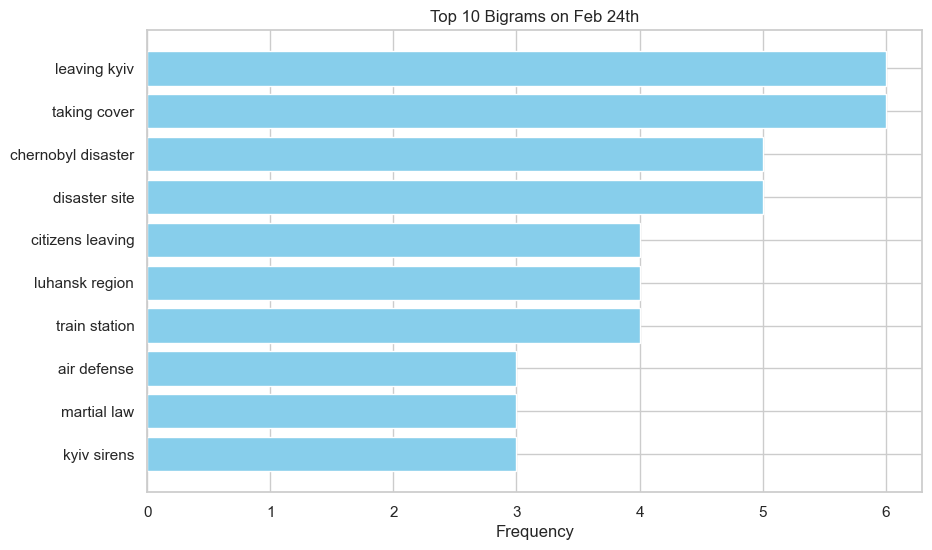

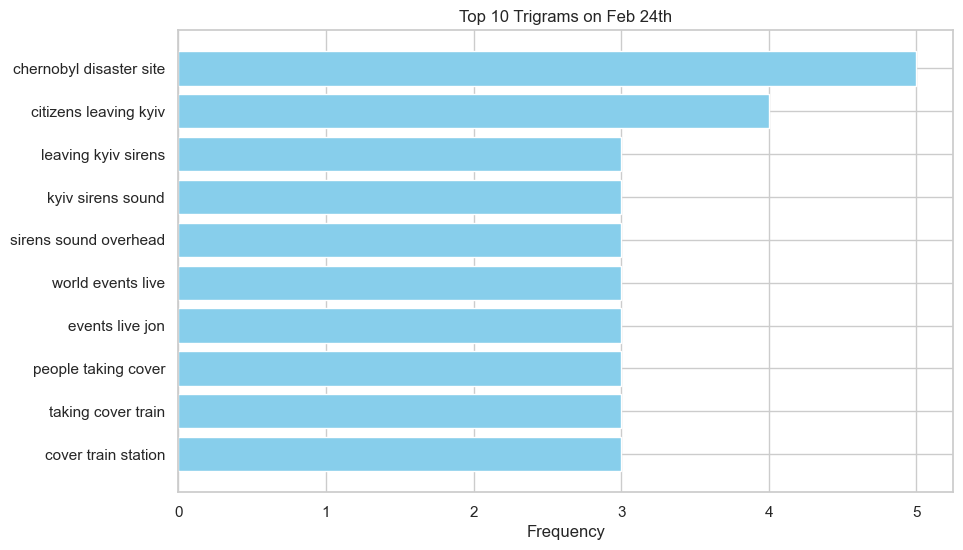

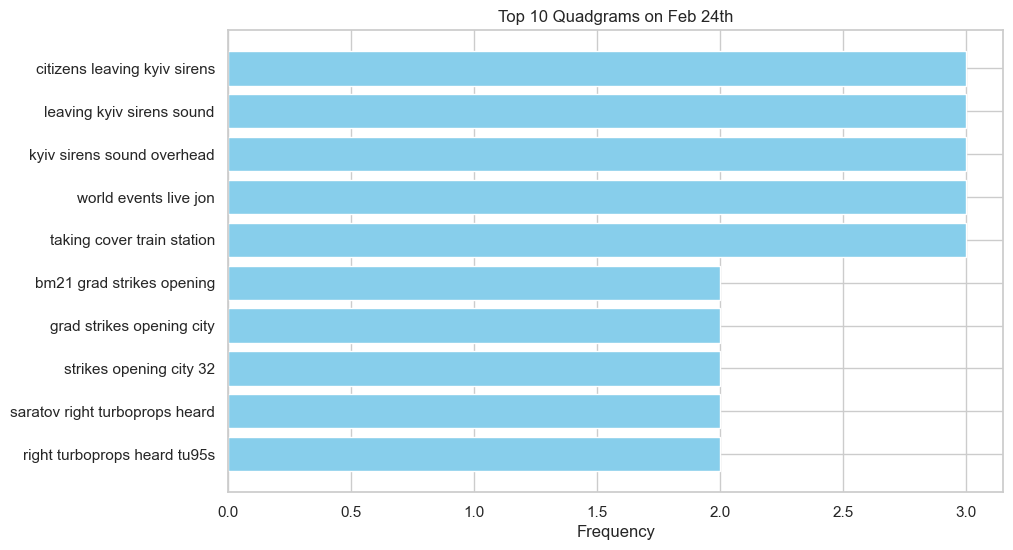

In [35]:
top_bigrams_feb24 = get_top_ngrams(df_feb_24['CleanText'], n=10, ngram_range=(2, 2))
top_trigrams_feb24 = get_top_ngrams(df_feb_24['CleanText'], n=10, ngram_range=(3, 3))
top_quadgrams_feb24 = get_top_ngrams(df_feb_24['CleanText'], n=10, ngram_range=(4, 4))
plot_top_ngrams(top_bigrams_feb24, 'Top 10 Bigrams on Feb 24th')
plot_top_ngrams(top_trigrams_feb24, 'Top 10 Trigrams on Feb 24th')
plot_top_ngrams(top_quadgrams_feb24, 'Top 10 Quadgrams on Feb 24th')


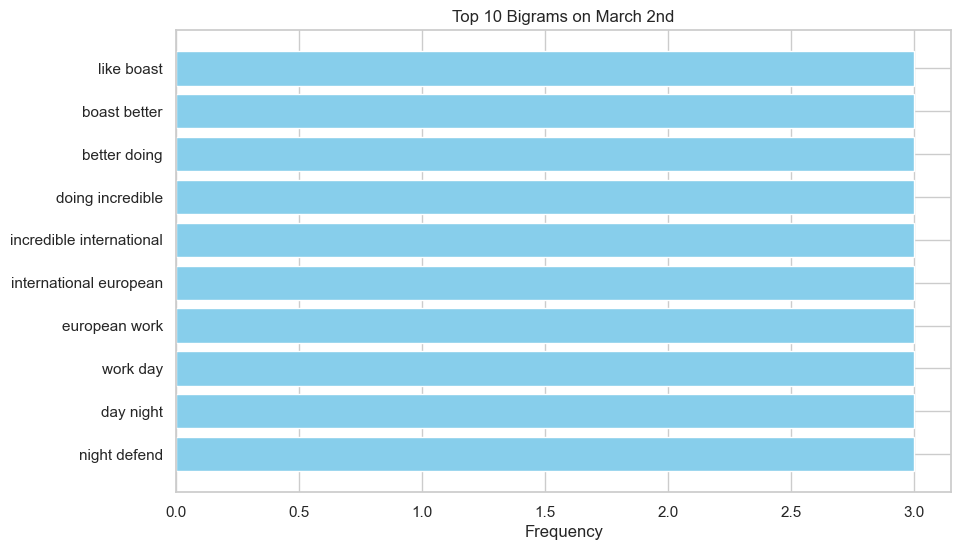

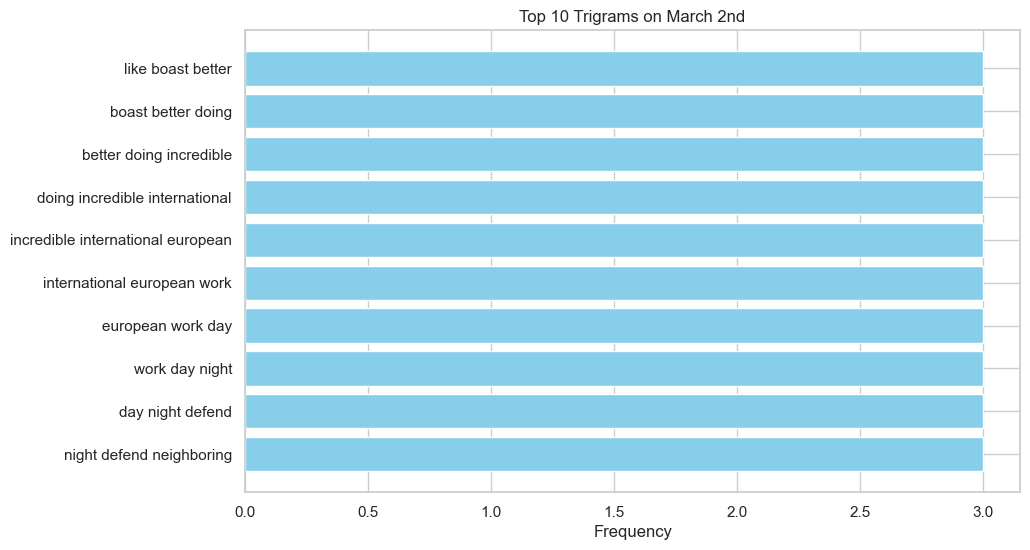

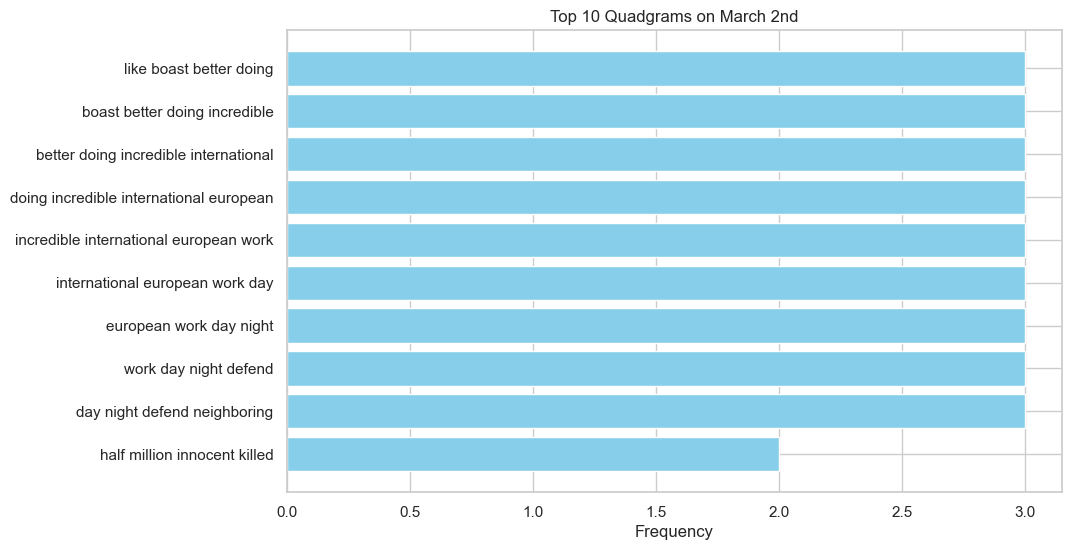

In [36]:
top_bigrams_mar2 = get_top_ngrams(df_mar_2['CleanText'], n=10, ngram_range=(2, 2))
top_trigrams_mar2 = get_top_ngrams(df_mar_2['CleanText'], n=10, ngram_range=(3, 3))
top_quadgrams_mar2 = get_top_ngrams(df_mar_2['CleanText'], n=10, ngram_range=(4, 4))
plot_top_ngrams(top_bigrams_mar2, 'Top 10 Bigrams on March 2nd')
plot_top_ngrams(top_trigrams_mar2, 'Top 10 Trigrams on March 2nd')
plot_top_ngrams(top_quadgrams_mar2, 'Top 10 Quadgrams on March 2nd')

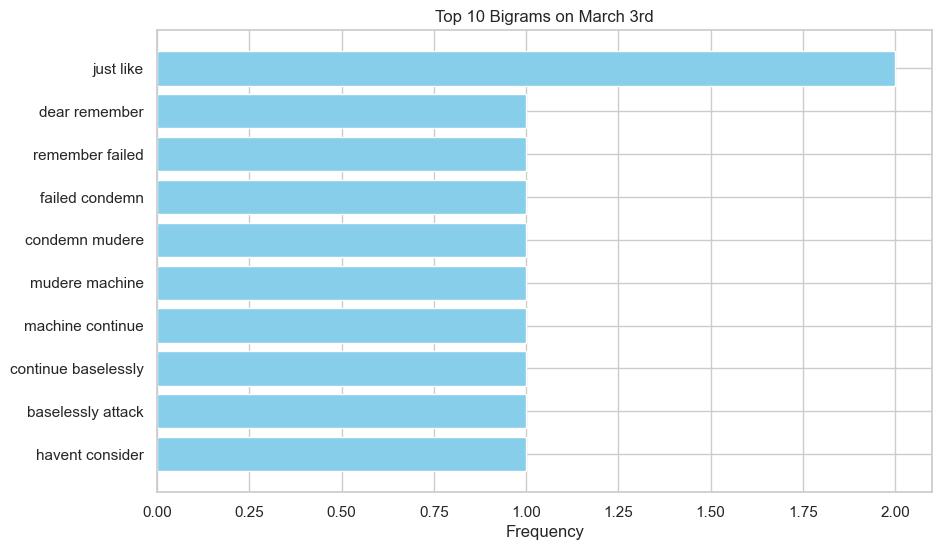

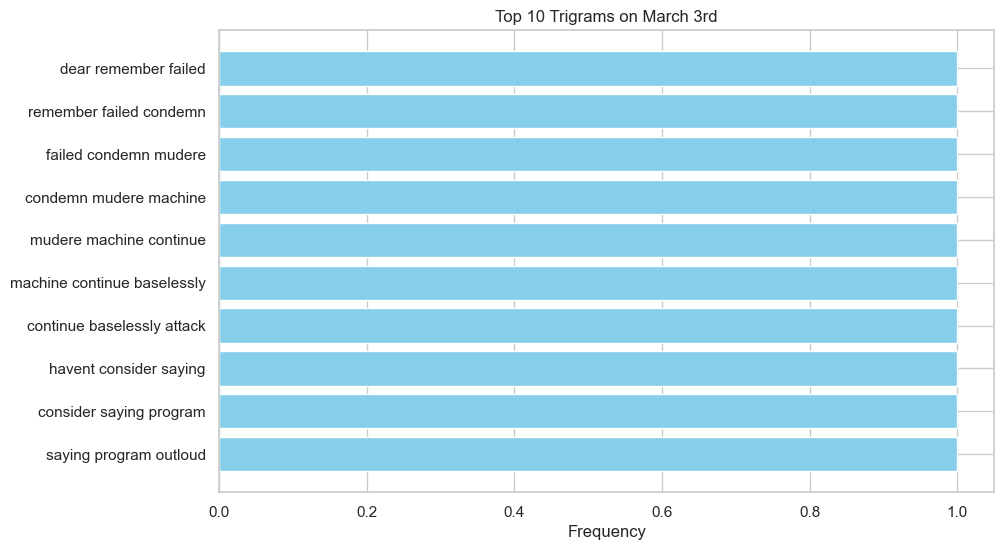

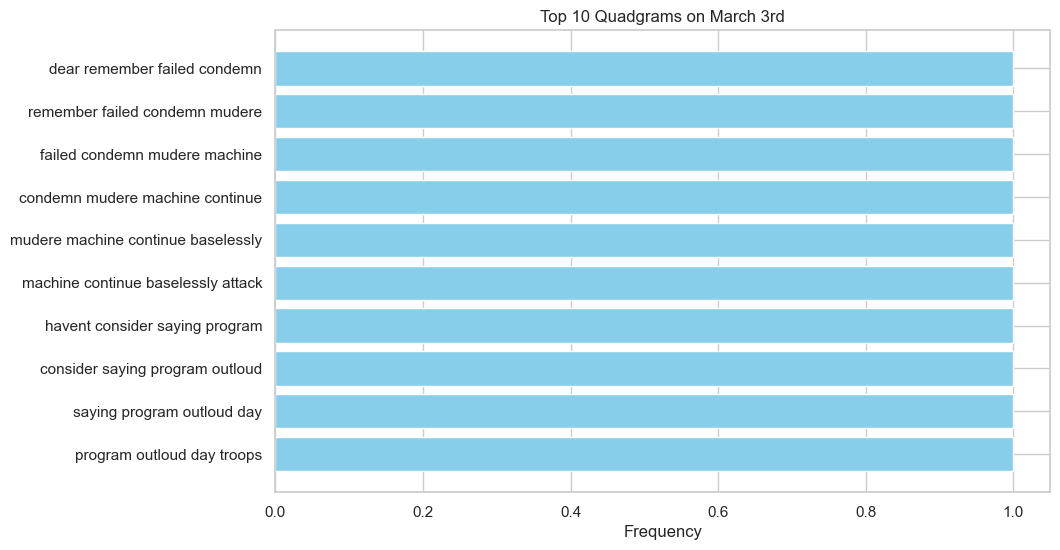

In [37]:
top_bigrams_mar3 = get_top_ngrams(df_mar_3['CleanText'], n=10, ngram_range=(2, 2))
top_trigrams_mar3 = get_top_ngrams(df_mar_3['CleanText'], n=10, ngram_range=(3, 3))
top_quadgrams_mar3 = get_top_ngrams(df_mar_3['CleanText'], n=10, ngram_range=(4, 4))
plot_top_ngrams(top_bigrams_mar3, 'Top 10 Bigrams on March 3rd')
plot_top_ngrams(top_trigrams_mar3, 'Top 10 Trigrams on March 3rd')
plot_top_ngrams(top_quadgrams_mar3, 'Top 10 Quadgrams on March 3rd')

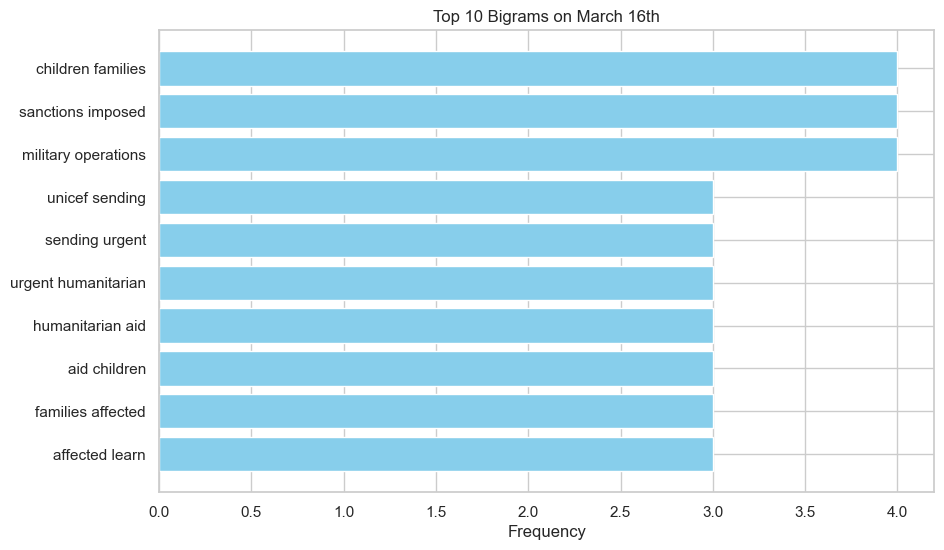

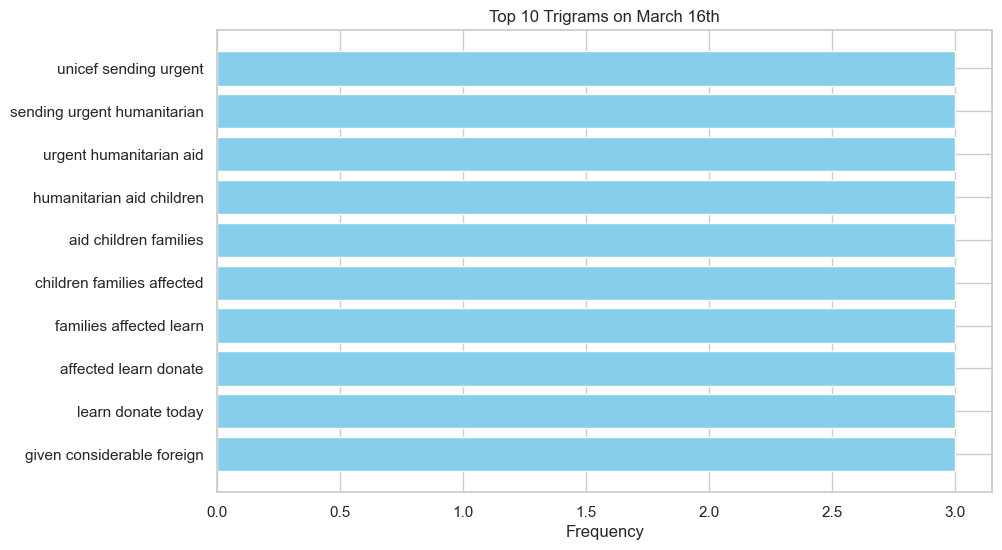

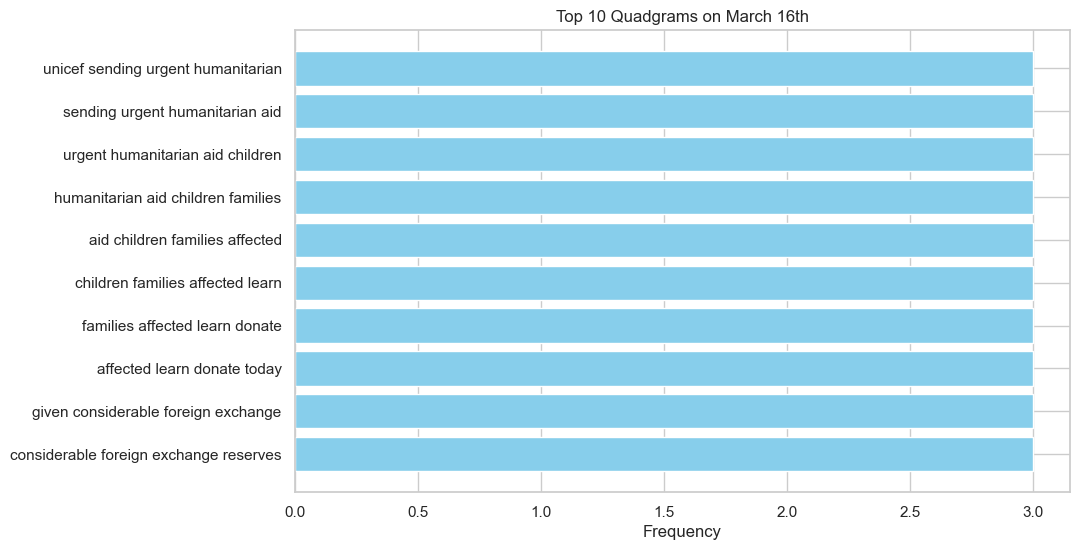

In [38]:
top_bigrams_mar16 = get_top_ngrams(df_mar_16['CleanText'], n=10, ngram_range=(2, 2))
top_trigrams_mar16 = get_top_ngrams(df_mar_16['CleanText'], n=10, ngram_range=(3, 3))
top_quadgrams_mar16 = get_top_ngrams(df_mar_16['CleanText'], n=10, ngram_range=(4, 4))
plot_top_ngrams(top_bigrams_mar16, 'Top 10 Bigrams on March 16th')
plot_top_ngrams(top_trigrams_mar16, 'Top 10 Trigrams on March 16th')
plot_top_ngrams(top_quadgrams_mar16, 'Top 10 Quadgrams on March 16th')